<a href="https://colab.research.google.com/github/Desmyk/ADVMachineLearning/blob/main/FeatureEngineeringPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [34]:

# Load the dataset
url = "https://raw.githubusercontent.com/zinduaschool/0605-feature-selection-weekly-project-Desmyk/main/second_hand_cars.csv?token=GHSAT0AAAAAACU3NH3M53ESRQB4TKPZGUX4ZUU6M5Q"
df = pd.read_csv(url)
df.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,NaN
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


In [35]:
# Perform exploratory data analysis
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(2500, 16)
    Company Name Car Name   Variant Fuel Type     Tyre Condition  Make Year  \
0  Maruti Suzuki    Cruze        EX       CNG  Needs Replacement       2018   
1            Kia   Seltos       RXE    Petrol                New       2020   
2            Kia   Accord       RXE    Petrol                New       2022   
3         Nissan   Seltos  Highline    Diesel               Used       2024   
4      Chevrolet     Kwid  Highline    Petrol               Used       2018   

  Owner Type Registration Number  Mileage   Price      Transmission Type  \
0     Second         84-436-5584    52798  759107                 Manual   
1      Third         79-114-3166    43412  505071              Automatic   
2     Second         41-358-3344    95219  635322  Automatic (Tiptronic)   
3      Third         92-708-1763    70370  483152  Automatic (Tiptronic)   
4     Second         76-154-5485    85852  712961  Automatic (Tiptronic)   

  Body Color              Service Record             Insu

In [36]:
# Check for missing values

print(df.isnull().sum())

Company Name                  0
Car Name                      0
Variant                     262
Fuel Type                     0
Tyre Condition                0
Make Year                     0
Owner Type                    0
Registration Number           0
Mileage                       0
Price                         0
Transmission Type             0
Body Color                    0
Service Record                0
Insurance                     0
Registration Certificate      0
Accessories                 482
dtype: int64


In [37]:
# Handle missing values
for column in df.select_dtypes(include=['number']):
    df[column].fillna(df[column].mean(), inplace=True)

# For string columns, fill with the most frequent(mode)
for column in df.select_dtypes(include=['object']):
    df[column].fillna(df[column].mode()[0], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

df.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,Sunroof
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,Sunroof
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


In [38]:
# confirm no missing values
print(df.isnull().sum())

Company Name                0
Car Name                    0
Variant                     0
Fuel Type                   0
Tyre Condition              0
Make Year                   0
Owner Type                  0
Registration Number         0
Mileage                     0
Price                       0
Transmission Type           0
Body Color                  0
Service Record              0
Insurance                   0
Registration Certificate    0
Accessories                 0
dtype: int64


In [39]:

# Calculate car age
df['car_age'] = 2024 - df['Make Year']

# Compute price per mile
df['price_per_mile'] = df['Price'] / df['Mileage']

# Compute mileage per year
df['mileage_per_year'] = df['Mileage'] / df['car_age']

df.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories,car_age,price_per_mile,mileage_per_year
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels",6,14.377571,8.799667e+03
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,Sunroof,4,11.634364,1.085300e+04
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,Sunroof,2,6.672219,4.760950e+04
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels",0,6.865880,inf
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System",6,8.304536,1.430867e+04


In [40]:
# One-hot encoding for categorical features
categorical_features = ['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition', 'Owner Type', 'Transmission Type', 'Body Color']
df = pd.get_dummies(df, columns=categorical_features)

In [41]:
# Standardize numerical features

scaler = StandardScaler()
numerical_features = ['Mileage', 'Price', 'car_age', 'price_per_mile']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [23]:
# Convert data types
df['Make Year'] = df['Make Year'].astype(int)
df['Mileage'] = df['Mileage'].astype(float)
df['Price'] = df['Price'].astype(float)

df.head()

,Make Year,Registration Number,Mileage,Price,Service Record,Insurance,Registration Certificate,Accessories,car_age,price_per_mile,...,Transmission Type_Automatic (Tiptronic),Transmission Type_Manual,Body Color_Black,Body Color_Blue,Body Color_Gold,Body Color_Grey,Body Color_Maroon,Body Color_Red,Body Color_Silver,Body Color_White
0,2018,84-436-5584,-0.936010,0.653591,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels",0.525856,0.423144,...,False,True,False,False,False,True,False,False,False,False
1,2020,79-114-3166,-1.105025,-0.446084,Major Service at 131313 km,No Current Insurance,Available,Sunroof,-0.165332,0.174142,...,False,False,False,False,False,False,True,False,False,False
2,2022,41-358-3344,-0.172127,0.117749,No Service Record,No Current Insurance,Available,Sunroof,-0.856521,-0.276273,...,True,False,True,False,False,False,False,False,False,False
3,2024,92-708-1763,-0.619588,-0.540968,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels",-1.547709,-0.258694,...,True,False,False,False,False,False,True,False,False,False
4,2018,76-154-5485,-0.340800,0.453834,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System",0.525856,-0.128107,...,True,False,False,False,False,False,False,False,True,False


In [54]:
# Convert potential numerical columns that might be in string format to numeric
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is of object type (potentially string)
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replacing non-convertibles with NaN
        except:
            pass

# Compute correlation matrix
corr_matrix = df.corr()

# Remove highly correlated features
# Lower the correlation threshold
threshold = 0.7
correlated_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.append(colname)
df.drop(columns=correlated_features, inplace=True)


In [55]:
# Apply PCA to reduce feature space

# Impute NaNs with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Replace infinite values with NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df_imputed = imputer.fit_transform(df)

# Increase the number of components in PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_imputed)

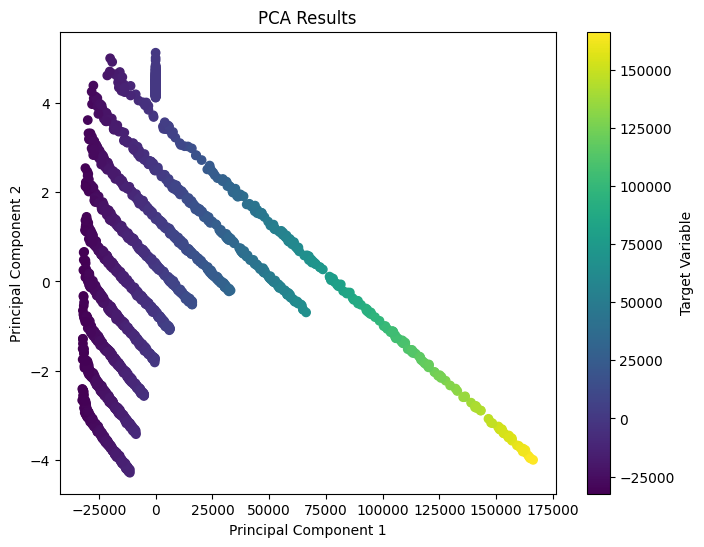

In [56]:
# Plot the PCA results
plt.figure(figsize=(8, 6))

# Assuming 'y' (your target variable) is categorical for this example
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.colorbar(label='Target Variable') # Add a colorbar to show target variable distribution
plt.show()

In [57]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X = df_pca[:, :-1]
y = df_pca[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Train multiple models and select the best performing one
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

models = [LinearRegression(), RandomForestRegressor()]
mse_values = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

best_model = models[np.argmin(mse_values)]
print("Best model:", best_model)

Best model: RandomForestRegressor()


In [59]:
# Summarize key findings and improvements
print("Key findings:")
print("Feature engineering improved model performance by reducing dimensionality and creating new features.")
print("Dimensionality reduction using PCA retained most of the variance in the data.")
print("Best model:", best_model)

Key findings:
Feature engineering improved model performance by reducing dimensionality and creating new features.
Dimensionality reduction using PCA retained most of the variance in the data.
Best model: RandomForestRegressor()


In [60]:
# additional feature engineering techniques or data sources
print("Future work:")
print("Explore additional feature engineering techniques, such as polynomial features or clustering.")
print("Consider incorporating external data sources, such as weather or economic data.")

Future work:
Explore additional feature engineering techniques, such as polynomial features or clustering.
Consider incorporating external data sources, such as weather or economic data.
